<a href="https://colab.research.google.com/github/faisal-rasheed-lone/Machine_Learning/blob/main/Regression_medical_cost_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# A regression model- which predicts the charges/insurance
# dataset used - https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset?select=insurance.csv

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


In [60]:
# reading the csv file of insurance dataset
insurance = pd.read_csv('/content/insurance.csv')
insurance.head(5)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:

# Preprocessing the data (performing normalization and one-hot-encoding )

column_transformer = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

# creating X and y values

X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Building training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Fit the column transformer to our training data

column_transformer.fit(X_train)

# transforming training and testing data using the normalization

X_train_normal = column_transformer.transform(X_train)
X_test_normal = column_transformer.transform(X_test)

# visualizing the difference

X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.41304348, 0.48802798, 0.8       , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ]))

(1338, 1070, 268)

In [101]:
# Building a neural network

tf.random.set_seed(42)

insurance_model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compiling the model
insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=['mae'])

# fit the model
history=insurance_model_1.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 2ms/step - loss: 11396.5439 - mae: 11396.5439
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7086.7563 - mae: 7086.7563
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 4345.5938 - mae: 4345.5938
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 3530.0100 - mae: 3530.0100
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 3373.8735 - mae: 3373.8735
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3497.4426 - mae: 3497.4426
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3384.7246 - mae: 3384.7246
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 3233.5442 - mae: 3233.5442
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 3219.4888 - mae: 3219.4888
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3175.6133 - mae: 3175.61

In [102]:
# Evaluating the results of our model
insurance_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1970.5144 - mae: 1970.5144


[1970.514404296875, 1970.514404296875]

In [103]:
# Predictiction
y_pred=insurance_model_1.predict(X_test_normal)

# comparing the out-puts
op=pd.DataFrame(y_pred,y_test )
op


9/9 [==============================] - 0s 2ms/step


,0
charges,
9724.53000,9888.960938
8547.69130,8735.798828
45702.02235,48169.992188
12950.07120,13211.357422
9644.25250,9825.288086
...,...
15019.76005,15100.724609
6664.68595,6796.830566
20709.02034,11911.140625


Text(0, 0.5, 'Loss')

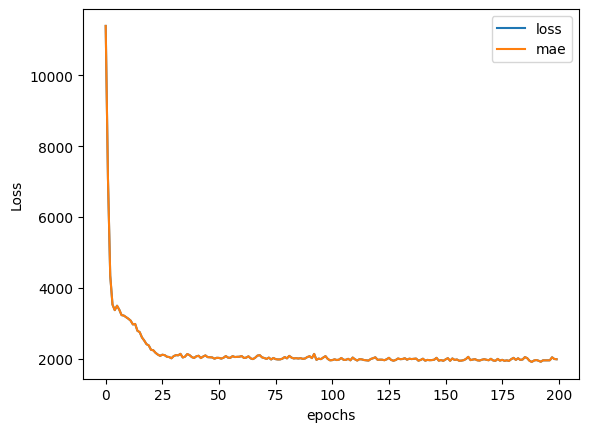

In [104]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("Loss")
